In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\Work_NN\PythonDirectory\churn_analysis")

In [5]:
df_lostCust=pd.read_excel("LostCustomers_June2018.xlsx")
df_lostCust.replace('#',np.nan,inplace=True)
df_lostCust.head()

,Plant,CustSeg,NBD,RCS,CustID,CustName,CentralOrderBlk,ZFNP,GP4,First_dt,Last_dt
0,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32389,ROBBINSDALE FOOD MARKET,ZA,407446.73,13229.06,2016-10-04,2018-01-16
1,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32590,MORE VALU III,ZA,660382.03,22679.60,2016-10-05,2017-11-01
2,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,33164,NEW HOPE PUMP AND MUNCH,ZA,200769.05,7371.92,2017-01-16,2018-01-05
3,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,30987,LAPICANTE MARKET,NaN,123721.53,4001.76,2016-10-06,2017-10-05
4,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,32561,CEDAR FOOD & GRILL,ZA,367311.19,13266.36,2016-10-03,2017-10-09


In [6]:
df_lostCust.shape

(1005, 11)

In [7]:
df_lostCust.nunique()

Plant                 7
CustSeg               1
NBD                  85
RCS                  81
CustID             1005
CustName            975
CentralOrderBlk       8
ZFNP               1005
GP4                1004
First_dt            287
Last_dt             247
dtype: int64

In [10]:
df_mnthlySales=pd.read_excel("Sales_Monthly.xlsx")
df_mnthlySales.head()

,Plant,CustID,CustGrp,Jan_17,Jul_17,Aug_17,Sep_17,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
0,Montgomery,12304,CSTORE-OVER 800SQFT,102375.33,107931.74,103939.75,106077.41,103923.11,83844.94,97439.69,84857.42,82248.39,98115.73,84338.97,102510.99,109473.45,1267076.92
1,Montgomery,12459,CSTORE-UNDER 800SQFT,2213.69,4565.08,3968.08,3621.53,3650.69,2721.40,1696.51,3250.88,3723.11,2450.09,2587.58,3225.35,3350.58,41024.57
2,Montgomery,12519,CSTORE-UNDER 800SQFT,82115.25,83055.79,88329.33,85013.45,85059.73,76843.80,77222.86,71517.58,70512.38,80770.60,70098.24,89248.12,92376.59,1052163.72
3,Montgomery,12529,CSTORE-UNDER 800SQFT,51138.07,56963.76,53032.58,44199.18,56406.04,46000.72,44068.28,48968.54,43421.56,53781.96,55104.24,53569.95,44884.08,651538.96
4,Montgomery,12550,CSTORE-OVER 800SQFT,35120.06,29210.94,47714.46,29950.65,38509.83,26194.72,29346.83,35442.74,22335.95,29915.79,24303.34,42737.08,33037.81,423820.20


In [12]:
df_mnthlySales.shape

(5267, 17)

In [13]:
df_mnthlySales.nunique()

Plant            7
CustID        5261
CustGrp          8
Jan_17        4024
Jul_17        4050
Aug_17        4132
Sep_17        4134
Oct_17        4156
Nov_17        4165
Dec_17        4156
Jan_18        4191
Feb_18        4233
Mar_18        4289
Apr_18        4277
May_18        4329
Jun_18        4290
Total_sale    5220
dtype: int64

In [16]:
df_mnthlySales[df_mnthlySales.duplicated(['CustID'],keep=False)]

,Plant,CustID,CustGrp,Jan_17,Jul_17,Aug_17,Sep_17,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
2527,Ypsilanti,35607,CSTORE-OVER 800SQFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66865.10,65496.29,-102.30,NaN,NaN,NaN,132259.09
2528,Ypsilanti,35607,VENDOR-WHOLESALER WI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110673.68,175991.37,141826.36,164047.39,592538.80
2720,Plainfield,27682,CSTORE-OVER 800SQFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32474.36,54167.48,86641.84
2721,Plainfield,27682,CSTORE-UNDER 800SQFT,NaN,NaN,54980.80,37271.66,46480.53,61425.42,38106.93,54707.31,50064.35,54103.13,54559.55,29046.95,NaN,480746.63
2823,Plainfield,31098,CSTORE-OVER 800SQFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16665.53,31643.67,39363.95,43531.99,131205.14
2824,Plainfield,31098,CSTORE-UNDER 800SQFT,48558.39,45864.18,41777.10,47950.51,35548.09,10124.38,2561.70,NaN,NaN,NaN,NaN,NaN,NaN,232384.35
3037,Springfield,23285,CSTORE-OVER 800SQFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6596.54,18685.74,23007.30,48289.58
3038,Springfield,23285,CSTORE-UNDER 800SQFT,13718.29,16612.98,16694.77,14467.31,13250.08,14962.96,12769.33,15129.74,11874.34,14038.43,8086.22,NaN,NaN,151604.45
3415,Rockmart,17796,CSTORE-OVER 800SQFT,NaN,NaN,NaN,NaN,NaN,246.30,NaN,105.80,NaN,168.30,53.13,-221.43,132.22,484.32
3416,Rockmart,17796,CSTORE-UNDER 800SQFT,12518.12,5729.19,773.68,78.95,124.15,39.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19263.81


In [23]:
df_lostSales=pd.merge(df_lostCust,df_mnthlySales,on=('CustID','Plant'),how='left')
df_lostSales.head()

,Plant,CustSeg,NBD,RCS,CustID,CustName,CentralOrderBlk,ZFNP,GP4,First_dt,...,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
0,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32389,ROBBINSDALE FOOD MARKET,ZA,407446.73,13229.06,2016-10-04,...,31243.55,19583.76,23864.23,15621.74,NaN,NaN,NaN,NaN,NaN,207959.34
1,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32590,MORE VALU III,ZA,660382.03,22679.60,2016-10-05,...,25083.54,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249892.72
2,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,33164,NEW HOPE PUMP AND MUNCH,ZA,200769.05,7371.92,2017-01-16,...,24545.86,20352.86,9611.86,4994.07,NaN,NaN,NaN,NaN,NaN,136042.51
3,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,30987,LAPICANTE MARKET,NaN,123721.53,4001.76,2016-10-06,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16722.26
4,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,32561,CEDAR FOOD & GRILL,ZA,367311.19,13266.36,2016-10-03,...,11491.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117024.27


In [24]:
df_lostSales.shape

(1006, 26)

In [25]:
df_lostSales.nunique()

Plant                 7
CustSeg               1
NBD                  85
RCS                  81
CustID             1005
CustName            975
CentralOrderBlk       8
ZFNP               1005
GP4                1004
First_dt            287
Last_dt             247
CustGrp               7
Jan_17              677
Jul_17              642
Aug_17              638
Sep_17              592
Oct_17              546
Nov_17              507
Dec_17              444
Jan_18              401
Feb_18              363
Mar_18              335
Apr_18              239
May_18              174
Jun_18               48
Total_sale          961
dtype: int64

In [26]:
df_lostSales[df_lostSales.duplicated(['CustID'],keep=False)]

,Plant,CustSeg,NBD,RCS,CustID,CustName,CentralOrderBlk,ZFNP,GP4,First_dt,...,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
572,Rockmart,Independents,Matthew Oram,Jason Clary,17796,CHEVRON FD MT STN MTN ARA1813,NaN,139656.41,6621.17,2016-10-06,...,NaN,246.30,NaN,105.8,NaN,168.3,53.13,-221.43,132.22,484.32
573,Rockmart,Independents,Matthew Oram,Jason Clary,17796,CHEVRON FD MT STN MTN ARA1813,NaN,139656.41,6621.17,2016-10-06,...,124.15,39.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19263.81


In [33]:
df_lostSales.drop(columns='CustSeg',inplace=True)


ValueError: labels ['CustSeg'] not contained in axis

In [34]:
df_lostSales.head()

,Plant,NBD,RCS,CustID,CustName,CentralOrderBlk,ZFNP,GP4,First_dt,Last_dt,...,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
0,Eau Claire,Beverly Parnell,Dawn Stahnke,32389,ROBBINSDALE FOOD MARKET,ZA,407446.73,13229.06,2016-10-04,2018-01-16,...,31243.55,19583.76,23864.23,15621.74,NaN,NaN,NaN,NaN,NaN,207959.34
1,Eau Claire,Beverly Parnell,Dawn Stahnke,32590,MORE VALU III,ZA,660382.03,22679.60,2016-10-05,2017-11-01,...,25083.54,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249892.72
2,Eau Claire,Beverly Parnell,Dawn Stahnke,33164,NEW HOPE PUMP AND MUNCH,ZA,200769.05,7371.92,2017-01-16,2018-01-05,...,24545.86,20352.86,9611.86,4994.07,NaN,NaN,NaN,NaN,NaN,136042.51
3,Eau Claire,Beverly Parnell,Patrick McGeehan,30987,LAPICANTE MARKET,NaN,123721.53,4001.76,2016-10-06,2017-10-05,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16722.26
4,Eau Claire,Beverly Parnell,Patrick McGeehan,32561,CEDAR FOOD & GRILL,ZA,367311.19,13266.36,2016-10-03,2017-10-09,...,11491.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117024.27


In [37]:
df_lostSales.groupby('CustGrp').sum()

,CustID,ZFNP,GP4,Jan_17,Jul_17,Aug_17,Sep_17,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
CustGrp,,,,,,,,,,,,,,,,,
CSTORE-OVER 800SQFT,23136871,1.465277e+08,4859289.62,10502214.67,8900097.45,9612651.64,7383987.83,7060495.66,6650061.08,4940975.22,4261129.49,3606126.22,2951141.22,1449149.70,840885.45,102779.37,68261695.00
CSTORE-UNDER 800SQFT,3601418,2.150401e+07,755785.44,1670181.12,1403187.45,1546448.64,1140981.88,1105899.31,1006973.73,778456.48,550893.83,398882.19,390554.90,215887.12,128155.18,11411.91,10347913.74
EBY INTERNAL ACCOUNT,27192,2.235178e+04,5011.81,0.00,0.00,6914.56,0.00,0.00,6059.01,0.00,0.00,0.00,0.00,2269.29,0.00,0.00,15242.86
LIQUOR STORE,1244849,2.557809e+06,97453.69,188023.71,163446.65,164621.26,121124.49,89487.66,101035.18,72794.16,73163.05,52617.67,60692.31,47039.77,38955.68,3969.21,1176970.80
TOBACCO OUTLET,1524909,9.997673e+06,237182.26,597694.61,568018.02,891592.45,908758.24,726259.48,692761.95,645369.82,396974.67,340189.50,402120.95,249453.01,118241.67,4154.17,6541588.54
VENDOR-WHOLESALER NO,129529,8.048623e+06,345892.07,440868.53,452600.71,338285.55,490002.90,487518.55,379949.92,346285.92,432715.40,446399.74,746342.18,825637.73,638297.89,0.00,6024905.02
VENDOR-WHOLESALER WI,231282,1.939369e+07,159490.64,1515579.50,1659304.49,1518759.04,1343697.44,1639169.76,1481498.78,1191637.40,210020.94,48839.97,1070740.92,141236.30,454.50,0.00,11820939.04


In [38]:
df_NacsSales=pd.read_excel("Sales_categorywise.xlsx")
df_NacsSales.head()

,Plant,CustID,Cigarettes,Other Tobacco,Pack Bev Non Alcoholic,Candy,Fluid Milk Products,Other Dairy,Pack Sand/Other Products,Pack Ice Cream/Nov,...,Health & Beauty Care,General Merchandise,Automotive Products,Fdsrv prepared on-site,Hot Dispensed Beverages,Cold Dispensed Beverages,Frozen Dispensed Beverages,Pre-paid Cards,Service Charges,Store Use/Supply
0,Montgomery,12304,1048932.28,57000.48,5610.52,27901.76,NaN,11.55,2086.13,NaN,...,296.66,13.20,84.96,653.20,1854.71,NaN,0.85,NaN,NaN,1356.49
1,Montgomery,12459,28461.52,NaN,1060.54,3784.80,NaN,NaN,NaN,37.32,...,879.09,741.58,5.40,NaN,37.11,NaN,NaN,NaN,NaN,273.20
2,Montgomery,12519,950902.90,789.96,1656.35,9093.81,NaN,NaN,NaN,NaN,...,12.78,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,102.37
3,Montgomery,12529,571072.43,26989.44,25.80,5875.17,NaN,NaN,NaN,NaN,...,313.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.26
4,Montgomery,12550,367004.78,11887.64,540.64,3846.87,597.48,178.58,333.09,NaN,...,6.24,53.13,81.36,18.99,708.85,NaN,NaN,NaN,NaN,926.90


In [40]:
df_NacsSales.shape

(5207, 28)

In [48]:
df_NacsSales.nunique()
df_NacsSales.drop(columns='Plant',inplace = True)
df_NacsSales.head()

,CustID,Cigarettes,Other Tobacco,Pack Bev Non Alcoholic,Candy,Fluid Milk Products,Other Dairy,Pack Sand/Other Products,Pack Ice Cream/Nov,Frozen Foods,...,Health & Beauty Care,General Merchandise,Automotive Products,Fdsrv prepared on-site,Hot Dispensed Beverages,Cold Dispensed Beverages,Frozen Dispensed Beverages,Pre-paid Cards,Service Charges,Store Use/Supply
0,12304,1048932.28,57000.48,5610.52,27901.76,NaN,11.55,2086.13,NaN,NaN,...,296.66,13.20,84.96,653.20,1854.71,NaN,0.85,NaN,NaN,1356.49
1,12459,28461.52,NaN,1060.54,3784.80,NaN,NaN,NaN,37.32,NaN,...,879.09,741.58,5.40,NaN,37.11,NaN,NaN,NaN,NaN,273.20
2,12519,950902.90,789.96,1656.35,9093.81,NaN,NaN,NaN,NaN,NaN,...,12.78,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,102.37
3,12529,571072.43,26989.44,25.80,5875.17,NaN,NaN,NaN,NaN,NaN,...,313.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.26
4,12550,367004.78,11887.64,540.64,3846.87,597.48,178.58,333.09,NaN,29.28,...,6.24,53.13,81.36,18.99,708.85,NaN,NaN,NaN,NaN,926.90


In [49]:
df_LostCat=pd.merge(df_lostCust,df_NacsSales,on='CustID',how='left')
df_LostCat.head()

,Plant,CustSeg,NBD,RCS,CustID,CustName,CentralOrderBlk,ZFNP,GP4,First_dt,...,Health & Beauty Care,General Merchandise,Automotive Products,Fdsrv prepared on-site,Hot Dispensed Beverages,Cold Dispensed Beverages,Frozen Dispensed Beverages,Pre-paid Cards,Service Charges,Store Use/Supply
0,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32389,ROBBINSDALE FOOD MARKET,ZA,407446.73,13229.06,2016-10-04,...,519.61,938.93,12.10,NaN,NaN,NaN,NaN,NaN,NaN,1.53
1,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,32590,MORE VALU III,ZA,660382.03,22679.60,2016-10-05,...,776.69,181.52,355.41,9.12,1509.90,NaN,NaN,NaN,NaN,439.47
2,Eau Claire,Independents,Beverly Parnell,Dawn Stahnke,33164,NEW HOPE PUMP AND MUNCH,ZA,200769.05,7371.92,2017-01-16,...,362.75,50.59,547.94,14.03,NaN,NaN,NaN,NaN,NaN,0.00
3,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,30987,LAPICANTE MARKET,NaN,123721.53,4001.76,2016-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eau Claire,Independents,Beverly Parnell,Patrick McGeehan,32561,CEDAR FOOD & GRILL,ZA,367311.19,13266.36,2016-10-03,...,189.45,3.96,2.49,NaN,398.62,57.56,NaN,NaN,NaN,376.08


In [51]:
df_LostCat.nunique()

Plant                            7
CustSeg                          1
NBD                             85
RCS                             81
CustID                        1005
CustName                       975
CentralOrderBlk                  8
ZFNP                          1005
GP4                           1004
First_dt                       287
Last_dt                        247
Cigarettes                     860
Other Tobacco                  802
Pack Bev Non Alcoholic         477
Candy                          810
Fluid Milk Products            219
Other Dairy                    229
Pack Sand/Other Products       323
Pack Ice Cream/Nov              93
Frozen Foods                   138
Packaged Breads                 73
Salty Snacks                   759
Packaged Sweet Snacks          714
Alternative Snacks             743
Perishable Grocery              38
Edible Grocery                 597
Non-Edible Grocery             478
Health & Beauty Care           622
General Merchandise 

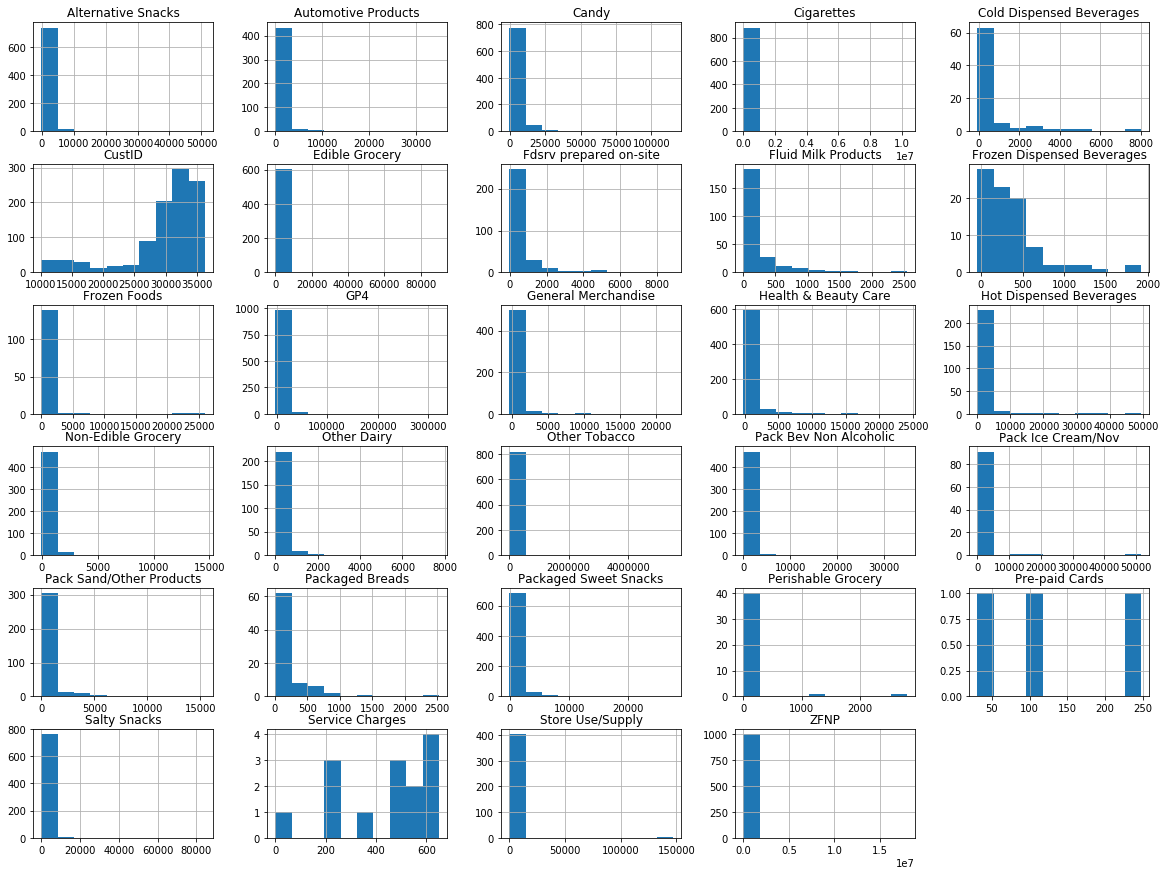

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
num_bins = 10
df_LostCat.hist(bins=num_bins, figsize=(20,15))
plt.savefig("CatSales_histogram_plots")
plt.show()

In [ ]:
ax = df_LostCat.plot.bar(x='lab', y='val', rot=0)